# Optimized Hyperparameters

| hyperparameter|ESOL|FP|AIT|FLVL|FLVU|HCOM|
|--------------:|---:|-:|--:|---:|---:|---:|
| hidden_size | 91 | 84 | 65 | 63 | 68 | 64 |
| dropout | 0.282 | 0.360 | 0.266 | 0.362 | 0.335 | 0.435 |
| num_layers | 2 | 4 | 4 | 3 | 2 | 4 |
| num_timesteps | 4 | 4 | 4 | 3 | 3 | 4 |
| lr_init | 0.01 | 0.01 | 0.01 | 0.01 | 0.001 | 0.01 |
| gamma | 0.980 | 0.994 | 0.995 | 0.982 | 0.995 | 0.995 |
| weight_decay | 6.0 $\times$ 10$^{-5}$ | 3.5 $\times$ 10$^{-3}$ | 1.8 $\times$ 10$^{-3}$ | 1.3 $\times$ 10$^{-2}$ | 1.2 $\times$ 10$^{-3}$ | 2.7 $\times$ 10$^{-3}$ |

# Hyperparameters

In [1]:
parameters = dict(
    subfrag_size = 12,
    edge_size = 3,
    out_size = 1,
    seed = 42,
    batch_size = 256,
    max_epoch = 200,
    verbose = True,
    save = True,
    
    target = 'HCOM',
    hidden_size = 64,
    dropout = 0.435,
    num_layers = 4,
    num_timesteps = 4,
    lr_init = 0.01,
    gamma = 0.995,
    weight_decay = 2.7E-3,
)
DATAPATH = "/SSD2/bgkang/Chemomile"

# Dataset

In [2]:
import sys
sys.path.append(DATAPATH)
from src.data import Dataset

dataset = Dataset(
    target = parameters['target'],
    seed = parameters['seed'],
    batch_size = parameters['batch_size'],
    verbose = parameters['verbose'],
    root = DATAPATH
)

Output()

CC(CC1C)(CCC1)C

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

	No DataDump found for 'HCOM'. Creating a new one.


C1[C@@](C)([H])(C[C@]([H])(C)(C1))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@](C)([H])(C[C@]([H])(C)(C1))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@@](C)([H])(C[C@]([H])(C)(CC1))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@](C)([H])(C[C@]([H])(C)(CC1))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@](C)([H])(C[C@]([H])(C)(C[C@]1([H])(C)))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1C2CC3(CC1CC(C2)(C3)C)C

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1C(C2(C)(C))CC2C(C)=C1

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

[C+]#[O-]

'NoneType' object has no attribute 'GetBonds'

C1(C)OC(C)OC(C)O1

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1C(=O)C=C(C)CC1(C)(C)

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@](O)([H])(C[C@](C)([H])(CC1))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@](O)([H])(C[C@@](C)([H])(CC1))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@H](C(C)C)([C@](O)([H])(C[C@](C)([H])(C1)))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1(O)C(O)C(O)C(O)C(O)C1(O)

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

O1[Si](C)(C)O[Si](C)(C)O[Si]1(C)(C)

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

[H][B]1([H])[H][B]([H])([H])[H]1

'NoneType' object has no attribute 'GetBonds'

[Si]1(C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@@](O)([H])(CC2=CC[C@H]3([C@@H]4(CC[C@H]([C@](C)(CCCC(C)C)([H]))([C@@]4(C)(CC[C@@H]3([C@@]2(C)(C1)))))))

Bad Conformer Id

O=C(CCCCCCCCCCC)OCC(OC(CCCCCCCCCCC)=O)COC(CCCCCCCCCCC)=O

Bad Conformer Id

O=C(CCCCCCCCCCCCC)OCC(OC(CCCCCCCCCCCCC)=O)COC(CCCCCCCCCCCCC)=O

Bad Conformer Id

CC/C=C\C/C=C\C/C=C\CCCCCCCC(=O)OCC(OC(=O)CCCCCCC/C=C\C/C=C\C/C=C\CC)COC(=O)CCCCCCC/C=C\C/C=C\C/C=C\CC

Bad Conformer Id

CCCCCCCC/C=C\CCCCCCCCCCCC(=O)OCC(OC(=O)CCCCCCCCCCC/C=C\CCCCCCCC)COC(=O)CCCCCCCCCCC/C=C\CCCCCCCC

Bad Conformer Id

C1N([N+](=O)([O-]))CN([N+](=O)([O-]))CN1([N+](=O)([O-]))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1N([N+](=O)([O-]))CN([N+](=O)([O-]))CN([N+](=O)([O-]))CN1([N+](=O)([O-]))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

c1ccccc1C[C@](C(=O)O)([H])(N)

Bad Conformer Id

C(COC(CCCCCCC\C=C/CCCCCCCC)=O)(COC(CCCCCCC\C=C/CCCCCCCC)=O)OC(CCCCCCC\C=C/CCCCCCCC)=O

Bad Conformer Id

O[C@H]1[C@H](O[C@H](CO)[C@@H](O)[C@@H]1O)O[C@]2(CO)O[C@H](CO)[C@@H](O)[C@@H]2O

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

[Ni](C#O)(C#O)(C#O)C#O

'NoneType' object has no attribute 'GetBonds'

[Si]1(C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O[Si](C)(C)O1

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

O1[C@]([H])(O)([C@]([H])(O)([C@](O)([H])([C@]([H])(O)([C@]1(C(O))([H])))))

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

OC(=O)CC[C@]([H])(C(=O)O)(N)

Bad Conformer Id

O1C(=O)C(O)=C(O)C1[C@@]([H])(CO)(O)

Bad Conformer Id

OC(=O)[C@](O)([H])([C@@]([H])(C(=O)O)(O))

Bad Conformer Id

[Fe](C#O)(C#O)(C#O)(C#O)C#O

'NoneType' object has no attribute 'GetBonds'

C1C2C(C(C(C(O1)O2)O)O)O

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C([C@H]1[C@H]([C@H]([C@@H]([C@@H](O1)O)O)O)O)O

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C([C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O)O)O)O)O

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@@H]([C@@H]([C@H]([C@H](O1)O)O)O)O

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

C1[C@@H]([C@H]([C@@H]([C@H](O1)O)O)O)O

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

CCCCCC[C@H](C/C=C\CCCCCCCC(=O)OC)O

Bad Conformer Id

O[C@@H]1CO[C@@](CO)(O)[C@@H](O)[C@@H]1O

Invariant Violation
        bad lower bound
        Violation occurred on line 187 in file Code/GraphMol/DistGeomHelpers/BoundsMatrixBuilder.cpp
        Failed Expression: lb > DIST12_DELTA || clb > DIST12_DELTA
        RDKIT: 2023.09.6
        BOOST: 1_78

Training : 700 | Validation : 88 | Test : 88
Total : 876


# Model

In [3]:
from src.model import Chemomile

model = Chemomile(
    subfrag_size = parameters['subfrag_size'],
    hidden_size = parameters['hidden_size'],
    out_size = parameters['out_size'],
    edge_size = parameters['edge_size'],
    dropout = parameters['dropout'],
    num_layers = parameters['num_layers'],
    num_timesteps = parameters['num_timesteps'],
)

# Training

In [4]:
from src.train import Training

train = Training(model, parameters, dataset = dataset, root = DATAPATH + "/Model")
train.run()

Output()

| Epoch :    0 | Trn. Loss : 8.028e+00 | Val. Loss : 6.963e-01 | LR : 1.000e-02 |

Saving the best model with valLoss : 0.696

| Epoch :    1 | Trn. Loss : 5.500e-01 | Val. Loss : 3.838e-01 | LR : 9.950e-03 |

Saving the best model with valLoss : 0.384

| Epoch :    2 | Trn. Loss : 6.211e-01 | Val. Loss : 6.681e-01 | LR : 9.900e-03 |

| Epoch :    3 | Trn. Loss : 5.172e-01 | Val. Loss : 4.901e-01 | LR : 9.851e-03 |

| Epoch :    4 | Trn. Loss : 3.760e-01 | Val. Loss : 2.509e-01 | LR : 9.801e-03 |

Saving the best model with valLoss : 0.251

| Epoch :    5 | Trn. Loss : 2.940e-01 | Val. Loss : 2.487e-01 | LR : 9.752e-03 |

Saving the best model with valLoss : 0.249

| Epoch :    6 | Trn. Loss : 2.729e-01 | Val. Loss : 1.481e-01 | LR : 9.704e-03 |

Saving the best model with valLoss : 0.148

| Epoch :    7 | Trn. Loss : 2.150e-01 | Val. Loss : 2.342e-01 | LR : 9.655e-03 |

| Epoch :    8 | Trn. Loss : 1.772e-01 | Val. Loss : 1.353e-01 | LR : 9.607e-03 |

Saving the best model with valLoss : 0.135

| Epoch :    9 | Trn. Loss : 1.491e-01 | Val. Loss : 9.568e-02 | LR : 9.559e-03 |

Saving the best model with valLoss : 0.096

| Epoch :   10 | Trn. Loss : 1.339e-01 | Val. Loss : 9.553e-02 | LR : 9.511e-03 |

Saving the best model with valLoss : 0.096

| Epoch :   11 | Trn. Loss : 1.087e-01 | Val. Loss : 1.132e-01 | LR : 9.464e-03 |

| Epoch :   12 | Trn. Loss : 1.215e-01 | Val. Loss : 7.692e-02 | LR : 9.416e-03 |

Saving the best model with valLoss : 0.077

| Epoch :   13 | Trn. Loss : 1.026e-01 | Val. Loss : 6.920e-02 | LR : 9.369e-03 |

Saving the best model with valLoss : 0.069

| Epoch :   14 | Trn. Loss : 9.572e-02 | Val. Loss : 6.959e-02 | LR : 9.322e-03 |

| Epoch :   15 | Trn. Loss : 8.899e-02 | Val. Loss : 6.593e-02 | LR : 9.276e-03 |

Saving the best model with valLoss : 0.066

| Epoch :   16 | Trn. Loss : 9.517e-02 | Val. Loss : 5.562e-02 | LR : 9.229e-03 |

Saving the best model with valLoss : 0.056

| Epoch :   17 | Trn. Loss : 9.969e-02 | Val. Loss : 9.427e-02 | LR : 9.183e-03 |

| Epoch :   18 | Trn. Loss : 1.189e-01 | Val. Loss : 6.124e-02 | LR : 9.137e-03 |

| Epoch :   19 | Trn. Loss : 8.983e-02 | Val. Loss : 4.131e-02 | LR : 9.092e-03 |

Saving the best model with valLoss : 0.041

| Epoch :   20 | Trn. Loss : 8.902e-02 | Val. Loss : 4.099e-02 | LR : 9.046e-03 |

Saving the best model with valLoss : 0.041

| Epoch :   21 | Trn. Loss : 9.361e-02 | Val. Loss : 6.779e-02 | LR : 9.001e-03 |

| Epoch :   22 | Trn. Loss : 8.367e-02 | Val. Loss : 4.956e-02 | LR : 8.956e-03 |

| Epoch :   23 | Trn. Loss : 7.508e-02 | Val. Loss : 3.566e-02 | LR : 8.911e-03 |

Saving the best model with valLoss : 0.036

| Epoch :   24 | Trn. Loss : 7.138e-02 | Val. Loss : 3.267e-02 | LR : 8.867e-03 |

Saving the best model with valLoss : 0.033

| Epoch :   25 | Trn. Loss : 7.586e-02 | Val. Loss : 4.860e-02 | LR : 8.822e-03 |

| Epoch :   26 | Trn. Loss : 8.431e-02 | Val. Loss : 5.200e-02 | LR : 8.778e-03 |

| Epoch :   27 | Trn. Loss : 9.059e-02 | Val. Loss : 3.581e-02 | LR : 8.734e-03 |

| Epoch :   28 | Trn. Loss : 6.879e-02 | Val. Loss : 3.881e-02 | LR : 8.691e-03 |

| Epoch :   29 | Trn. Loss : 7.803e-02 | Val. Loss : 3.592e-02 | LR : 8.647e-03 |

| Epoch :   30 | Trn. Loss : 6.675e-02 | Val. Loss : 4.266e-02 | LR : 8.604e-03 |

| Epoch :   31 | Trn. Loss : 7.854e-02 | Val. Loss : 4.416e-02 | LR : 8.561e-03 |

| Epoch :   32 | Trn. Loss : 6.393e-02 | Val. Loss : 3.656e-02 | LR : 8.518e-03 |

| Epoch :   33 | Trn. Loss : 7.324e-02 | Val. Loss : 4.262e-02 | LR : 8.475e-03 |

| Epoch :   34 | Trn. Loss : 6.795e-02 | Val. Loss : 4.483e-02 | LR : 8.433e-03 |

| Epoch :   35 | Trn. Loss : 6.213e-02 | Val. Loss : 3.842e-02 | LR : 8.391e-03 |

| Epoch :   36 | Trn. Loss : 8.311e-02 | Val. Loss : 4.304e-02 | LR : 8.349e-03 |

| Epoch :   37 | Trn. Loss : 7.502e-02 | Val. Loss : 5.401e-02 | LR : 8.307e-03 |

| Epoch :   38 | Trn. Loss : 7.318e-02 | Val. Loss : 3.792e-02 | LR : 8.266e-03 |

| Epoch :   39 | Trn. Loss : 5.938e-02 | Val. Loss : 4.781e-02 | LR : 8.224e-03 |

| Epoch :   40 | Trn. Loss : 5.992e-02 | Val. Loss : 3.410e-02 | LR : 8.183e-03 |

| Epoch :   41 | Trn. Loss : 5.919e-02 | Val. Loss : 2.580e-02 | LR : 8.142e-03 |

Saving the best model with valLoss : 0.026

| Epoch :   42 | Trn. Loss : 6.834e-02 | Val. Loss : 4.015e-02 | LR : 8.102e-03 |

| Epoch :   43 | Trn. Loss : 7.007e-02 | Val. Loss : 4.219e-02 | LR : 8.061e-03 |

| Epoch :   44 | Trn. Loss : 6.106e-02 | Val. Loss : 2.848e-02 | LR : 8.021e-03 |

| Epoch :   45 | Trn. Loss : 5.824e-02 | Val. Loss : 2.759e-02 | LR : 7.981e-03 |

| Epoch :   46 | Trn. Loss : 5.623e-02 | Val. Loss : 3.495e-02 | LR : 7.941e-03 |

| Epoch :   47 | Trn. Loss : 6.328e-02 | Val. Loss : 3.785e-02 | LR : 7.901e-03 |

| Epoch :   48 | Trn. Loss : 5.791e-02 | Val. Loss : 2.667e-02 | LR : 7.862e-03 |

| Epoch :   49 | Trn. Loss : 7.018e-02 | Val. Loss : 3.566e-02 | LR : 7.822e-03 |

| Epoch :   50 | Trn. Loss : 6.310e-02 | Val. Loss : 6.087e-02 | LR : 7.783e-03 |

| Epoch :   51 | Trn. Loss : 5.909e-02 | Val. Loss : 4.658e-02 | LR : 7.744e-03 |

| Epoch :   52 | Trn. Loss : 6.576e-02 | Val. Loss : 3.137e-02 | LR : 7.705e-03 |

| Epoch :   53 | Trn. Loss : 6.006e-02 | Val. Loss : 2.142e-02 | LR : 7.667e-03 |

Saving the best model with valLoss : 0.021

| Epoch :   54 | Trn. Loss : 7.507e-02 | Val. Loss : 3.626e-02 | LR : 7.629e-03 |

| Epoch :   55 | Trn. Loss : 7.203e-02 | Val. Loss : 5.253e-02 | LR : 7.590e-03 |

| Epoch :   56 | Trn. Loss : 7.801e-02 | Val. Loss : 3.474e-02 | LR : 7.553e-03 |

| Epoch :   57 | Trn. Loss : 5.115e-02 | Val. Loss : 2.352e-02 | LR : 7.515e-03 |

| Epoch :   58 | Trn. Loss : 4.769e-02 | Val. Loss : 2.433e-02 | LR : 7.477e-03 |

| Epoch :   59 | Trn. Loss : 5.111e-02 | Val. Loss : 3.512e-02 | LR : 7.440e-03 |

| Epoch :   60 | Trn. Loss : 6.233e-02 | Val. Loss : 2.910e-02 | LR : 7.403e-03 |

| Epoch :   61 | Trn. Loss : 4.872e-02 | Val. Loss : 2.372e-02 | LR : 7.366e-03 |

| Epoch :   62 | Trn. Loss : 5.158e-02 | Val. Loss : 1.888e-02 | LR : 7.329e-03 |

Saving the best model with valLoss : 0.019

| Epoch :   63 | Trn. Loss : 4.431e-02 | Val. Loss : 2.081e-02 | LR : 7.292e-03 |

| Epoch :   64 | Trn. Loss : 4.702e-02 | Val. Loss : 2.682e-02 | LR : 7.256e-03 |

| Epoch :   65 | Trn. Loss : 5.217e-02 | Val. Loss : 3.131e-02 | LR : 7.219e-03 |

| Epoch :   66 | Trn. Loss : 5.032e-02 | Val. Loss : 2.032e-02 | LR : 7.183e-03 |

| Epoch :   67 | Trn. Loss : 5.387e-02 | Val. Loss : 2.131e-02 | LR : 7.147e-03 |

| Epoch :   68 | Trn. Loss : 5.040e-02 | Val. Loss : 2.060e-02 | LR : 7.112e-03 |

| Epoch :   69 | Trn. Loss : 5.125e-02 | Val. Loss : 2.016e-02 | LR : 7.076e-03 |

| Epoch :   70 | Trn. Loss : 5.082e-02 | Val. Loss : 2.010e-02 | LR : 7.041e-03 |

| Epoch :   71 | Trn. Loss : 4.806e-02 | Val. Loss : 2.460e-02 | LR : 7.005e-03 |

| Epoch :   72 | Trn. Loss : 5.157e-02 | Val. Loss : 1.750e-02 | LR : 6.970e-03 |

Saving the best model with valLoss : 0.018

| Epoch :   73 | Trn. Loss : 5.312e-02 | Val. Loss : 1.951e-02 | LR : 6.936e-03 |

| Epoch :   74 | Trn. Loss : 4.165e-02 | Val. Loss : 2.148e-02 | LR : 6.901e-03 |

| Epoch :   75 | Trn. Loss : 5.113e-02 | Val. Loss : 1.459e-02 | LR : 6.866e-03 |

Saving the best model with valLoss : 0.015

| Epoch :   76 | Trn. Loss : 4.408e-02 | Val. Loss : 2.319e-02 | LR : 6.832e-03 |

| Epoch :   77 | Trn. Loss : 4.456e-02 | Val. Loss : 2.286e-02 | LR : 6.798e-03 |

| Epoch :   78 | Trn. Loss : 4.923e-02 | Val. Loss : 1.415e-02 | LR : 6.764e-03 |

Saving the best model with valLoss : 0.014

| Epoch :   79 | Trn. Loss : 4.631e-02 | Val. Loss : 2.334e-02 | LR : 6.730e-03 |

| Epoch :   80 | Trn. Loss : 4.900e-02 | Val. Loss : 2.985e-02 | LR : 6.696e-03 |

| Epoch :   81 | Trn. Loss : 4.622e-02 | Val. Loss : 1.741e-02 | LR : 6.663e-03 |

| Epoch :   82 | Trn. Loss : 4.520e-02 | Val. Loss : 1.681e-02 | LR : 6.630e-03 |

| Epoch :   83 | Trn. Loss : 3.898e-02 | Val. Loss : 2.134e-02 | LR : 6.597e-03 |

| Epoch :   84 | Trn. Loss : 4.542e-02 | Val. Loss : 1.635e-02 | LR : 6.564e-03 |

| Epoch :   85 | Trn. Loss : 4.050e-02 | Val. Loss : 1.535e-02 | LR : 6.531e-03 |

| Epoch :   86 | Trn. Loss : 4.656e-02 | Val. Loss : 2.499e-02 | LR : 6.498e-03 |

| Epoch :   87 | Trn. Loss : 4.106e-02 | Val. Loss : 2.825e-02 | LR : 6.466e-03 |

| Epoch :   88 | Trn. Loss : 5.803e-02 | Val. Loss : 1.746e-02 | LR : 6.433e-03 |

| Epoch :   89 | Trn. Loss : 4.032e-02 | Val. Loss : 1.925e-02 | LR : 6.401e-03 |

| Epoch :   90 | Trn. Loss : 4.766e-02 | Val. Loss : 2.077e-02 | LR : 6.369e-03 |

| Epoch :   91 | Trn. Loss : 3.596e-02 | Val. Loss : 1.677e-02 | LR : 6.337e-03 |

| Epoch :   92 | Trn. Loss : 4.848e-02 | Val. Loss : 2.956e-02 | LR : 6.306e-03 |

| Epoch :   93 | Trn. Loss : 5.431e-02 | Val. Loss : 3.703e-02 | LR : 6.274e-03 |

| Epoch :   94 | Trn. Loss : 6.232e-02 | Val. Loss : 1.848e-02 | LR : 6.243e-03 |

| Epoch :   95 | Trn. Loss : 4.252e-02 | Val. Loss : 1.602e-02 | LR : 6.211e-03 |

| Epoch :   96 | Trn. Loss : 5.561e-02 | Val. Loss : 3.664e-02 | LR : 6.180e-03 |

| Epoch :   97 | Trn. Loss : 4.425e-02 | Val. Loss : 3.126e-02 | LR : 6.149e-03 |

| Epoch :   98 | Trn. Loss : 4.789e-02 | Val. Loss : 2.596e-02 | LR : 6.119e-03 |

| Epoch :   99 | Trn. Loss : 4.532e-02 | Val. Loss : 1.359e-02 | LR : 6.088e-03 |

Saving the best model with valLoss : 0.014

| Epoch :  100 | Trn. Loss : 3.954e-02 | Val. Loss : 2.000e-02 | LR : 6.058e-03 |

| Epoch :  101 | Trn. Loss : 6.043e-02 | Val. Loss : 2.706e-02 | LR : 6.027e-03 |

| Epoch :  102 | Trn. Loss : 5.478e-02 | Val. Loss : 1.448e-02 | LR : 5.997e-03 |

| Epoch :  103 | Trn. Loss : 4.747e-02 | Val. Loss : 1.613e-02 | LR : 5.967e-03 |

| Epoch :  104 | Trn. Loss : 4.673e-02 | Val. Loss : 2.482e-02 | LR : 5.937e-03 |

| Epoch :  105 | Trn. Loss : 4.718e-02 | Val. Loss : 1.452e-02 | LR : 5.908e-03 |

| Epoch :  106 | Trn. Loss : 5.010e-02 | Val. Loss : 2.986e-02 | LR : 5.878e-03 |

| Epoch :  107 | Trn. Loss : 4.407e-02 | Val. Loss : 1.832e-02 | LR : 5.849e-03 |

| Epoch :  108 | Trn. Loss : 4.699e-02 | Val. Loss : 2.691e-02 | LR : 5.820e-03 |

| Epoch :  109 | Trn. Loss : 4.857e-02 | Val. Loss : 3.020e-02 | LR : 5.790e-03 |

| Epoch :  110 | Trn. Loss : 4.590e-02 | Val. Loss : 2.245e-02 | LR : 5.762e-03 |

| Epoch :  111 | Trn. Loss : 3.940e-02 | Val. Loss : 1.729e-02 | LR : 5.733e-03 |

| Epoch :  112 | Trn. Loss : 4.371e-02 | Val. Loss : 2.325e-02 | LR : 5.704e-03 |

| Epoch :  113 | Trn. Loss : 4.162e-02 | Val. Loss : 1.680e-02 | LR : 5.676e-03 |

| Epoch :  114 | Trn. Loss : 4.110e-02 | Val. Loss : 2.108e-02 | LR : 5.647e-03 |

| Epoch :  115 | Trn. Loss : 4.860e-02 | Val. Loss : 1.635e-02 | LR : 5.619e-03 |

| Epoch :  116 | Trn. Loss : 4.097e-02 | Val. Loss : 2.140e-02 | LR : 5.591e-03 |

| Epoch :  117 | Trn. Loss : 4.144e-02 | Val. Loss : 1.513e-02 | LR : 5.563e-03 |

| Epoch :  118 | Trn. Loss : 4.722e-02 | Val. Loss : 2.051e-02 | LR : 5.535e-03 |

| Epoch :  119 | Trn. Loss : 5.418e-02 | Val. Loss : 2.384e-02 | LR : 5.507e-03 |

| Epoch :  120 | Trn. Loss : 4.268e-02 | Val. Loss : 1.325e-02 | LR : 5.480e-03 |

Saving the best model with valLoss : 0.013

| Epoch :  121 | Trn. Loss : 3.986e-02 | Val. Loss : 1.452e-02 | LR : 5.452e-03 |

| Epoch :  122 | Trn. Loss : 5.441e-02 | Val. Loss : 3.172e-02 | LR : 5.425e-03 |

| Epoch :  123 | Trn. Loss : 4.077e-02 | Val. Loss : 2.640e-02 | LR : 5.398e-03 |

| Epoch :  124 | Trn. Loss : 5.347e-02 | Val. Loss : 2.577e-02 | LR : 5.371e-03 |

| Epoch :  125 | Trn. Loss : 4.671e-02 | Val. Loss : 1.143e-02 | LR : 5.344e-03 |

Saving the best model with valLoss : 0.011

| Epoch :  126 | Trn. Loss : 3.674e-02 | Val. Loss : 1.555e-02 | LR : 5.318e-03 |

| Epoch :  127 | Trn. Loss : 3.432e-02 | Val. Loss : 1.265e-02 | LR : 5.291e-03 |

| Epoch :  128 | Trn. Loss : 4.394e-02 | Val. Loss : 1.315e-02 | LR : 5.264e-03 |

| Epoch :  129 | Trn. Loss : 4.714e-02 | Val. Loss : 2.619e-02 | LR : 5.238e-03 |

| Epoch :  130 | Trn. Loss : 4.185e-02 | Val. Loss : 2.881e-02 | LR : 5.212e-03 |

| Epoch :  131 | Trn. Loss : 4.712e-02 | Val. Loss : 4.925e-02 | LR : 5.186e-03 |

| Epoch :  132 | Trn. Loss : 4.708e-02 | Val. Loss : 2.964e-02 | LR : 5.160e-03 |

| Epoch :  133 | Trn. Loss : 4.597e-02 | Val. Loss : 2.770e-02 | LR : 5.134e-03 |

| Epoch :  134 | Trn. Loss : 4.364e-02 | Val. Loss : 1.631e-02 | LR : 5.108e-03 |

| Epoch :  135 | Trn. Loss : 3.684e-02 | Val. Loss : 1.729e-02 | LR : 5.083e-03 |

| Epoch :  136 | Trn. Loss : 3.650e-02 | Val. Loss : 1.292e-02 | LR : 5.058e-03 |

| Epoch :  137 | Trn. Loss : 3.957e-02 | Val. Loss : 1.055e-02 | LR : 5.032e-03 |

Saving the best model with valLoss : 0.011

| Epoch :  138 | Trn. Loss : 3.330e-02 | Val. Loss : 1.312e-02 | LR : 5.007e-03 |

| Epoch :  139 | Trn. Loss : 3.781e-02 | Val. Loss : 1.319e-02 | LR : 4.982e-03 |

| Epoch :  140 | Trn. Loss : 3.805e-02 | Val. Loss : 1.149e-02 | LR : 4.957e-03 |

| Epoch :  141 | Trn. Loss : 3.139e-02 | Val. Loss : 1.290e-02 | LR : 4.932e-03 |

| Epoch :  142 | Trn. Loss : 3.870e-02 | Val. Loss : 1.172e-02 | LR : 4.908e-03 |

| Epoch :  143 | Trn. Loss : 3.602e-02 | Val. Loss : 2.795e-02 | LR : 4.883e-03 |

| Epoch :  144 | Trn. Loss : 4.270e-02 | Val. Loss : 1.361e-02 | LR : 4.859e-03 |

| Epoch :  145 | Trn. Loss : 4.041e-02 | Val. Loss : 1.804e-02 | LR : 4.834e-03 |

| Epoch :  146 | Trn. Loss : 3.198e-02 | Val. Loss : 1.193e-02 | LR : 4.810e-03 |

| Epoch :  147 | Trn. Loss : 3.664e-02 | Val. Loss : 9.654e-03 | LR : 4.786e-03 |

Saving the best model with valLoss : 0.010

| Epoch :  148 | Trn. Loss : 3.614e-02 | Val. Loss : 1.235e-02 | LR : 4.762e-03 |

| Epoch :  149 | Trn. Loss : 3.914e-02 | Val. Loss : 1.205e-02 | LR : 4.738e-03 |

| Epoch :  150 | Trn. Loss : 4.437e-02 | Val. Loss : 3.859e-02 | LR : 4.715e-03 |

| Epoch :  151 | Trn. Loss : 5.079e-02 | Val. Loss : 2.275e-02 | LR : 4.691e-03 |

| Epoch :  152 | Trn. Loss : 4.171e-02 | Val. Loss : 4.513e-02 | LR : 4.668e-03 |

| Epoch :  153 | Trn. Loss : 4.931e-02 | Val. Loss : 1.788e-02 | LR : 4.644e-03 |

| Epoch :  154 | Trn. Loss : 3.628e-02 | Val. Loss : 1.770e-02 | LR : 4.621e-03 |

| Epoch :  155 | Trn. Loss : 3.608e-02 | Val. Loss : 1.443e-02 | LR : 4.598e-03 |

| Epoch :  156 | Trn. Loss : 3.328e-02 | Val. Loss : 1.475e-02 | LR : 4.575e-03 |

| Epoch :  157 | Trn. Loss : 3.775e-02 | Val. Loss : 1.263e-02 | LR : 4.552e-03 |

| Epoch :  158 | Trn. Loss : 3.537e-02 | Val. Loss : 1.128e-02 | LR : 4.529e-03 |

| Epoch :  159 | Trn. Loss : 4.368e-02 | Val. Loss : 1.019e-02 | LR : 4.507e-03 |

| Epoch :  160 | Trn. Loss : 4.731e-02 | Val. Loss : 1.751e-02 | LR : 4.484e-03 |

| Epoch :  161 | Trn. Loss : 3.723e-02 | Val. Loss : 1.306e-02 | LR : 4.462e-03 |

| Epoch :  162 | Trn. Loss : 3.584e-02 | Val. Loss : 2.175e-02 | LR : 4.440e-03 |

| Epoch :  163 | Trn. Loss : 3.845e-02 | Val. Loss : 1.662e-02 | LR : 4.417e-03 |

| Epoch :  164 | Trn. Loss : 3.865e-02 | Val. Loss : 2.560e-02 | LR : 4.395e-03 |

| Epoch :  165 | Trn. Loss : 4.761e-02 | Val. Loss : 1.265e-02 | LR : 4.373e-03 |

| Epoch :  166 | Trn. Loss : 3.824e-02 | Val. Loss : 1.375e-02 | LR : 4.351e-03 |

| Epoch :  167 | Trn. Loss : 3.431e-02 | Val. Loss : 1.563e-02 | LR : 4.330e-03 |

| Epoch :  168 | Trn. Loss : 3.751e-02 | Val. Loss : 1.369e-02 | LR : 4.308e-03 |

| Epoch :  169 | Trn. Loss : 4.526e-02 | Val. Loss : 9.484e-03 | LR : 4.286e-03 |

Saving the best model with valLoss : 0.009

| Epoch :  170 | Trn. Loss : 3.056e-02 | Val. Loss : 1.049e-02 | LR : 4.265e-03 |

| Epoch :  171 | Trn. Loss : 3.472e-02 | Val. Loss : 1.847e-02 | LR : 4.244e-03 |

| Epoch :  172 | Trn. Loss : 3.296e-02 | Val. Loss : 1.311e-02 | LR : 4.223e-03 |

| Epoch :  173 | Trn. Loss : 3.431e-02 | Val. Loss : 1.453e-02 | LR : 4.201e-03 |

| Epoch :  174 | Trn. Loss : 3.198e-02 | Val. Loss : 1.246e-02 | LR : 4.180e-03 |

| Epoch :  175 | Trn. Loss : 4.040e-02 | Val. Loss : 1.576e-02 | LR : 4.159e-03 |

| Epoch :  176 | Trn. Loss : 3.825e-02 | Val. Loss : 1.945e-02 | LR : 4.139e-03 |

| Epoch :  177 | Trn. Loss : 3.671e-02 | Val. Loss : 1.321e-02 | LR : 4.118e-03 |

| Epoch :  178 | Trn. Loss : 3.955e-02 | Val. Loss : 1.327e-02 | LR : 4.097e-03 |

| Epoch :  179 | Trn. Loss : 3.717e-02 | Val. Loss : 1.141e-02 | LR : 4.077e-03 |

| Epoch :  180 | Trn. Loss : 3.634e-02 | Val. Loss : 1.795e-02 | LR : 4.057e-03 |

| Epoch :  181 | Trn. Loss : 3.179e-02 | Val. Loss : 1.100e-02 | LR : 4.036e-03 |

| Epoch :  182 | Trn. Loss : 5.050e-02 | Val. Loss : 1.907e-02 | LR : 4.016e-03 |

| Epoch :  183 | Trn. Loss : 4.918e-02 | Val. Loss : 2.127e-02 | LR : 3.996e-03 |

| Epoch :  184 | Trn. Loss : 4.526e-02 | Val. Loss : 1.473e-02 | LR : 3.976e-03 |

| Epoch :  185 | Trn. Loss : 4.904e-02 | Val. Loss : 2.933e-02 | LR : 3.956e-03 |

| Epoch :  186 | Trn. Loss : 5.089e-02 | Val. Loss : 1.473e-02 | LR : 3.936e-03 |

| Epoch :  187 | Trn. Loss : 5.654e-02 | Val. Loss : 1.447e-02 | LR : 3.917e-03 |

| Epoch :  188 | Trn. Loss : 4.673e-02 | Val. Loss : 2.200e-02 | LR : 3.897e-03 |

| Epoch :  189 | Trn. Loss : 4.627e-02 | Val. Loss : 1.415e-02 | LR : 3.878e-03 |

| Epoch :  190 | Trn. Loss : 4.817e-02 | Val. Loss : 3.710e-02 | LR : 3.858e-03 |

| Epoch :  191 | Trn. Loss : 3.836e-02 | Val. Loss : 2.036e-02 | LR : 3.839e-03 |

| Epoch :  192 | Trn. Loss : 4.540e-02 | Val. Loss : 3.950e-02 | LR : 3.820e-03 |

| Epoch :  193 | Trn. Loss : 5.186e-02 | Val. Loss : 1.886e-02 | LR : 3.801e-03 |

| Epoch :  194 | Trn. Loss : 4.546e-02 | Val. Loss : 9.505e-03 | LR : 3.782e-03 |

| Epoch :  195 | Trn. Loss : 3.957e-02 | Val. Loss : 8.925e-03 | LR : 3.763e-03 |

Saving the best model with valLoss : 0.009

| Epoch :  196 | Trn. Loss : 3.438e-02 | Val. Loss : 1.172e-02 | LR : 3.744e-03 |

| Epoch :  197 | Trn. Loss : 3.627e-02 | Val. Loss : 1.511e-02 | LR : 3.725e-03 |

| Epoch :  198 | Trn. Loss : 3.583e-02 | Val. Loss : 1.086e-02 | LR : 3.707e-03 |

| Epoch :  199 | Trn. Loss : 4.372e-02 | Val. Loss : 2.014e-02 | LR : 3.688e-03 |

# Loss Curve

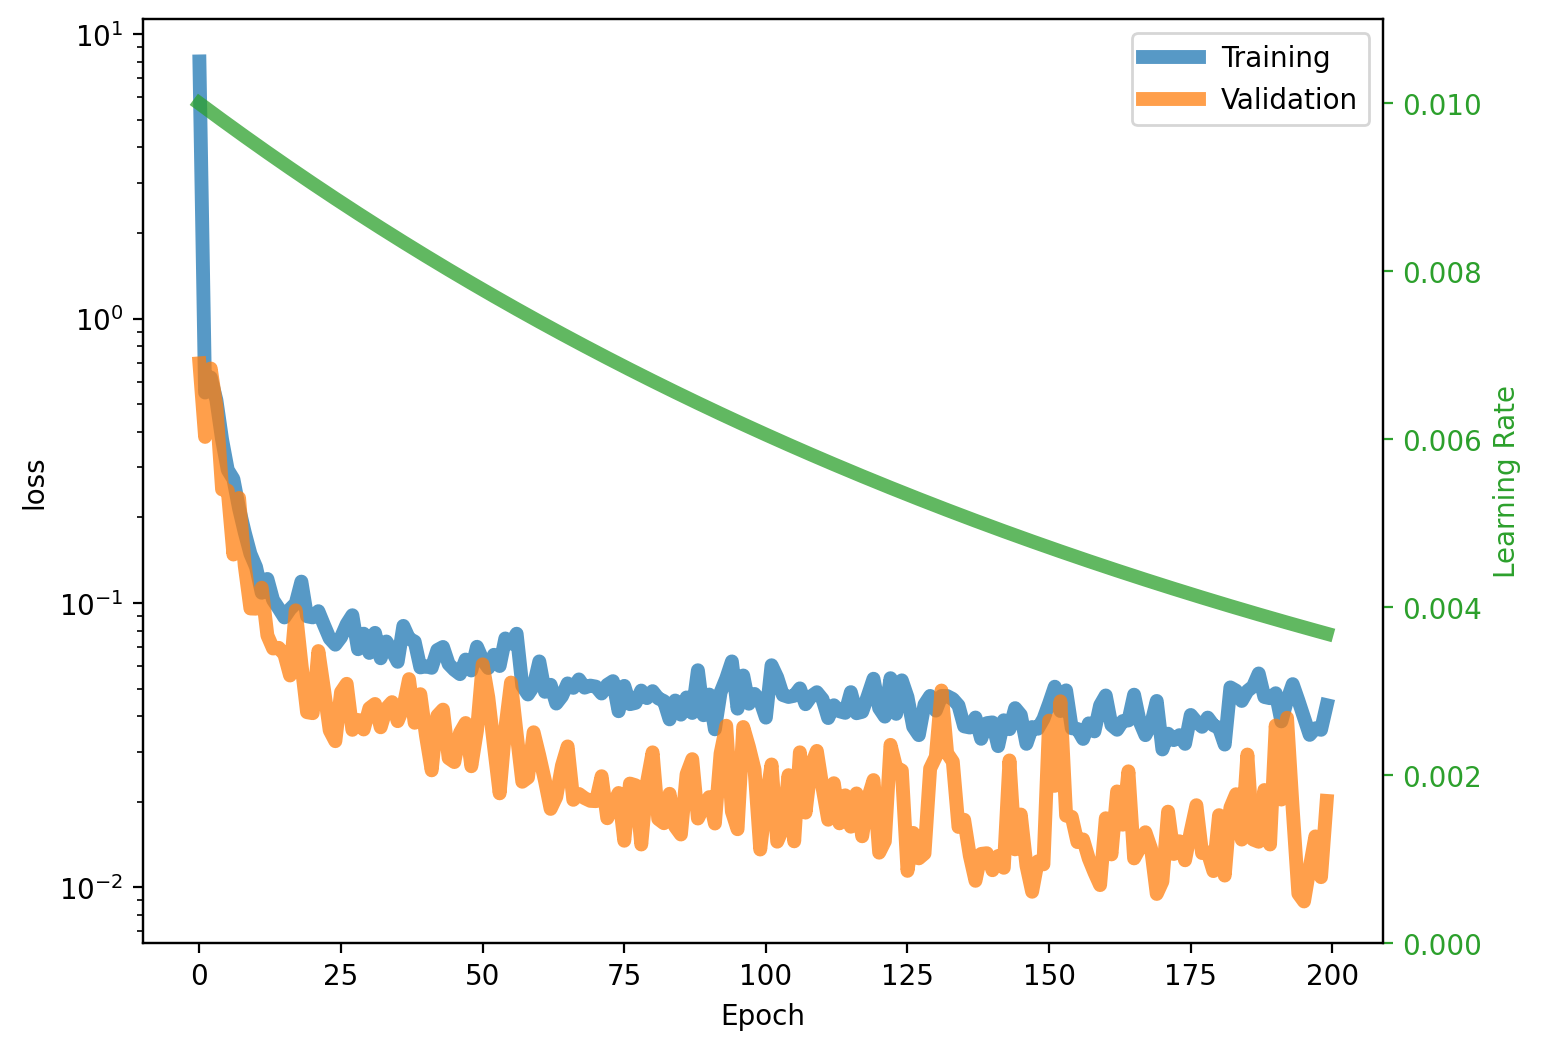

In [5]:
train.lossCurve()

# Test

In [6]:
# train.TPPlot()

# Better Plot

## Total Set

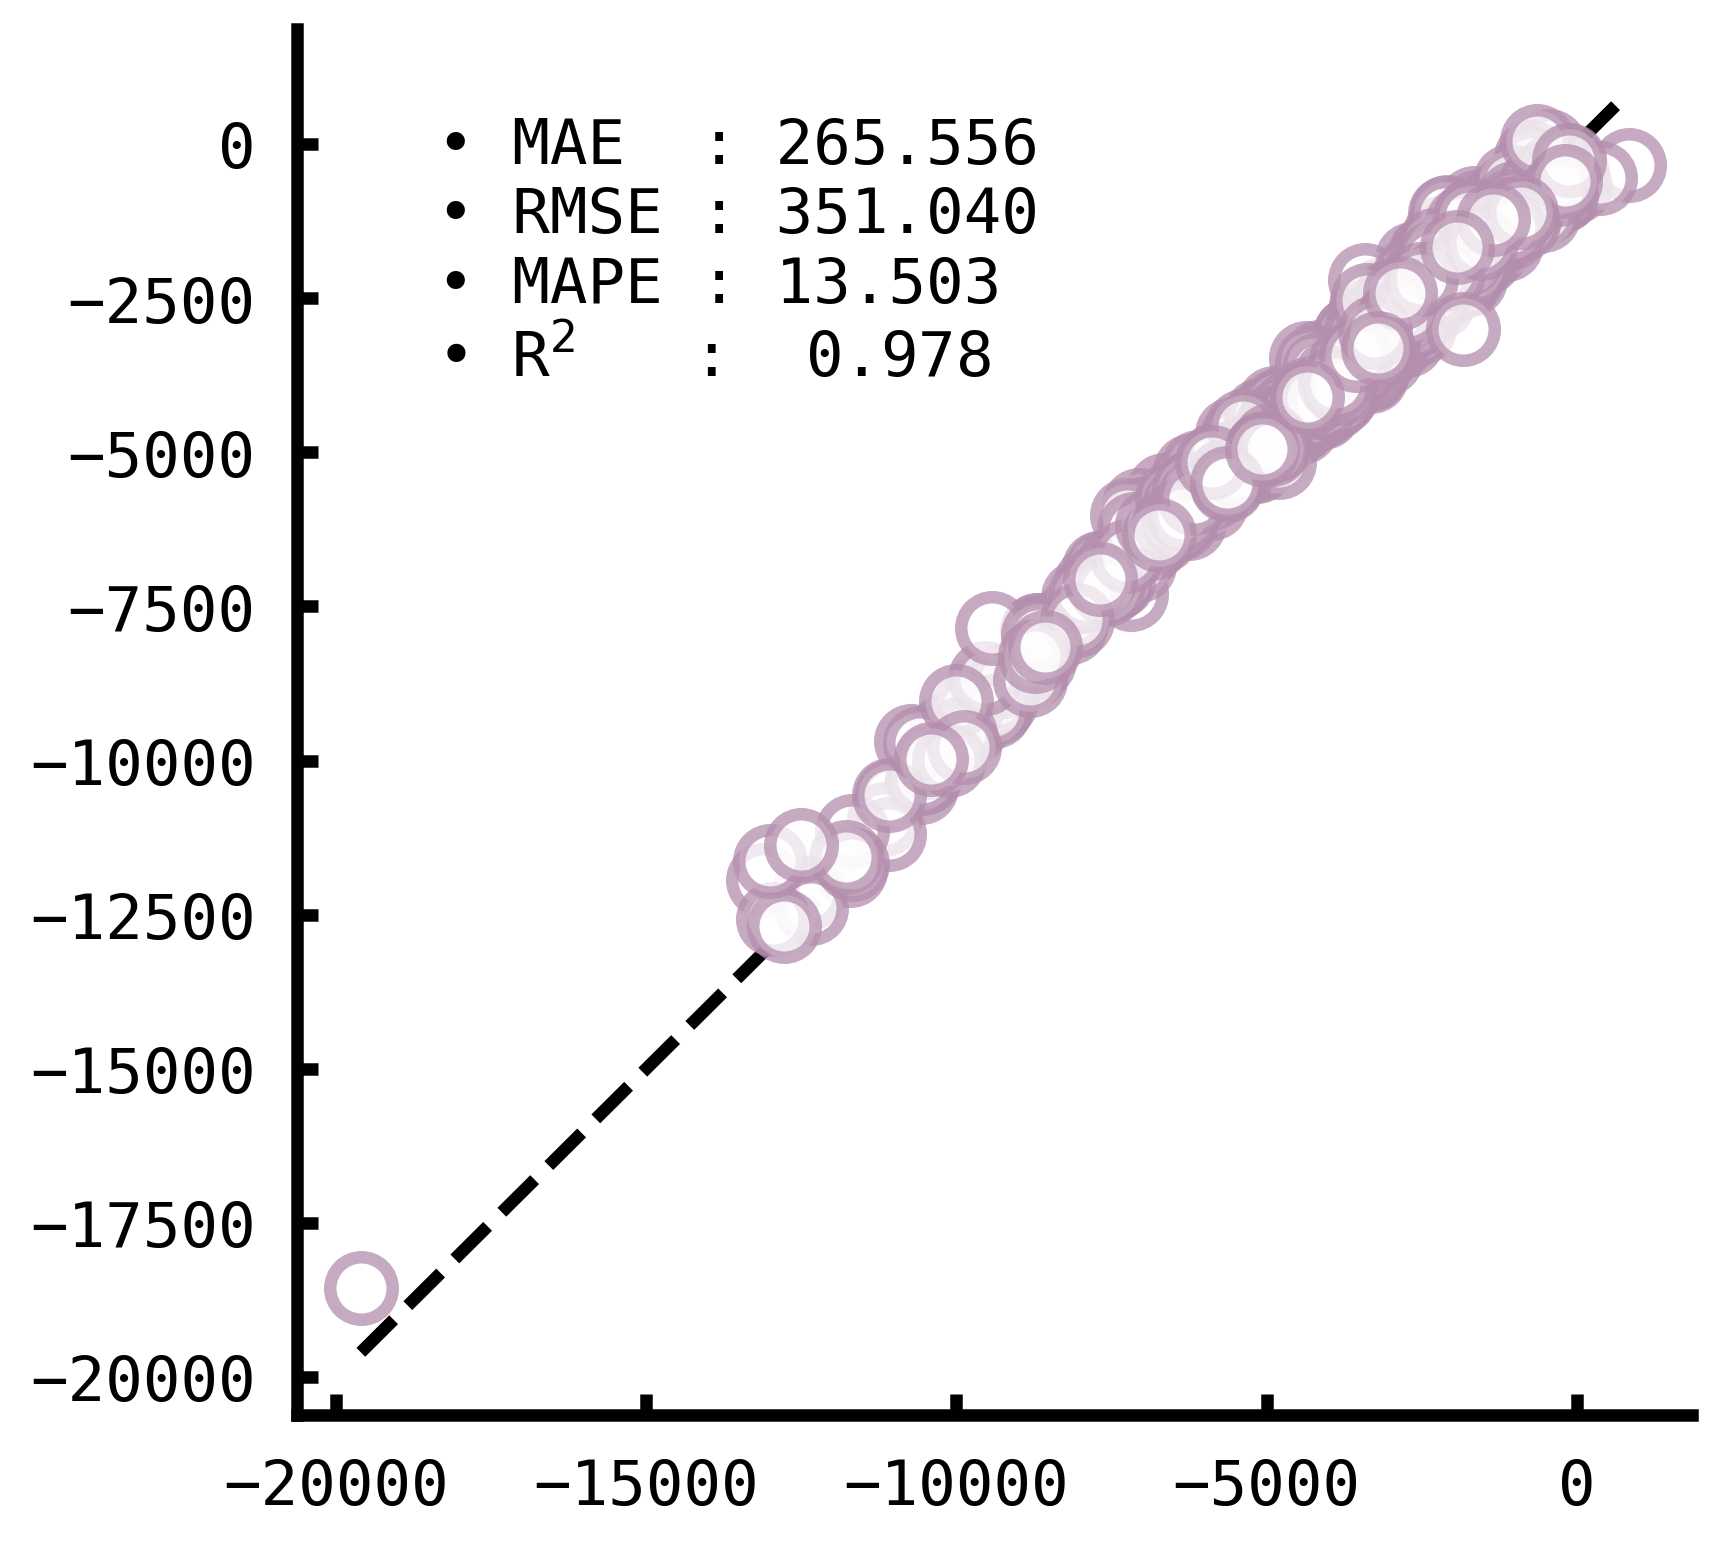

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

##########################
AXISWIDTH = 3
MARKERSIZE = 15
FONTSIZE_LABEL = 20
FONTSIZE_TICK = 15
TICK_PAD = 10
TICK_LENGTH = 5
MARKEREDGE = 3
COLOR = "#B48EAD"
ALPHA = 0.75
##########################

true, pred = train.eval(total = True)
train.metrics(true, pred)

fig = plt.figure(figsize = (6,6), dpi = 300)
ax = plt.gca()

if parameters['target'] == "HCOM":
    true = true * 1.0E-6
    pred = pred * 1.0E-6
    train.metrics(true, pred)

ax.plot([true.min(), true.max()], [true.min(), true.max()],
        color = 'k', linestyle = '--', linewidth = AXISWIDTH)
ax.plot(true, pred, marker = 'o', alpha = ALPHA,
        color = "#FFFFFF", markeredgecolor = COLOR, markeredgewidth = MARKEREDGE, markersize = MARKERSIZE)

annot = f"• MAE  : {train.mae:>6.3f}\n• RMSE : {train.rmse:>6.3f}\n• MAPE : {train.mdape:>4.3f}\n• R$^2$   : {train.r2:>6.3f}"
ax.annotate(annot, xy = (0.1, 0.75), xycoords = 'axes fraction', fontsize = FONTSIZE_TICK)

ax.spines['left'].set_linewidth(AXISWIDTH)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(AXISWIDTH)

# ax.set_title(f"{parameters['target']}", fontsize = FONTSIZE_LABEL)
# ax.set_xlabel("True", fontsize = FONTSIZE_LABEL)
# ax.set_ylabel("Predicted", fontsize = FONTSIZE_LABEL)
ax.tick_params(labelsize = FONTSIZE_TICK, width = AXISWIDTH, length = TICK_LENGTH, direction = 'in', pad = TICK_PAD)

plt.savefig(f"{parameters['target']}_total.png", dpi = 300)
plt.show()

xlim = [true.min(), true.max()]
ylim = [true.min(), true.max()]

## Test Set

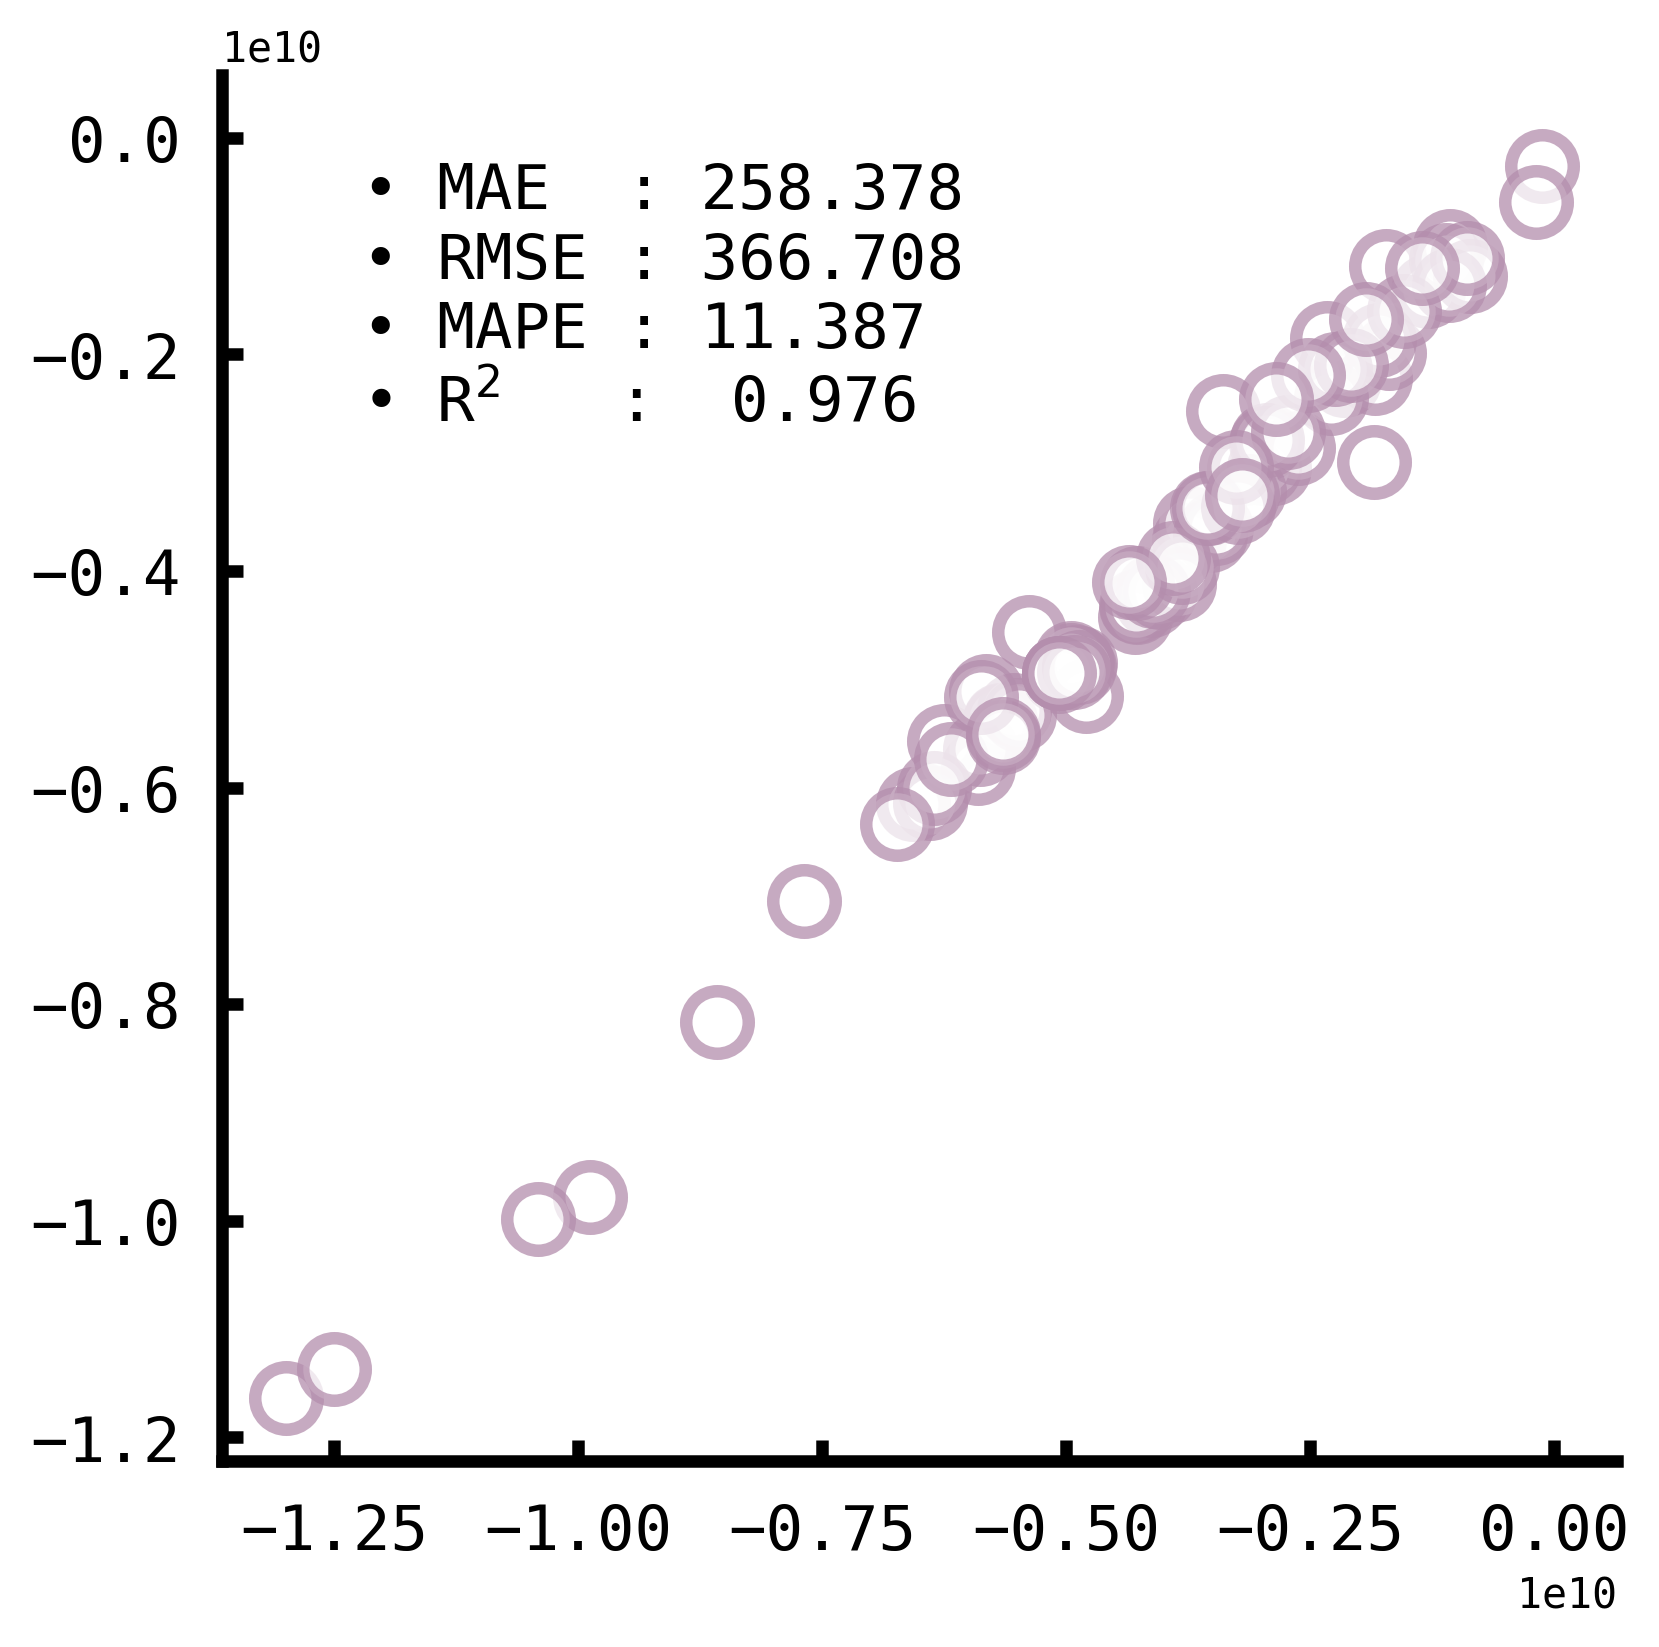

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

##########################
AXISWIDTH = 3
MARKERSIZE = 15
FONTSIZE_LABEL = 20
FONTSIZE_TICK = 15
TICK_PAD = 10
TICK_LENGTH = 5
MARKEREDGE = 3
COLOR = "#B48EAD"
ALPHA = 0.75
##########################

true, pred = train.eval(total = False)
train.metrics(true, pred)

fig = plt.figure(figsize = (6,6), dpi = 300)
ax = plt.gca()

if parameters['target'] == "HCOM":
    true = true * 1.0E-6
    pred = pred * 1.0E-6
    train.metrics(true, pred)

ax.plot(xlim, ylim,
        color = 'k', linestyle = '--', linewidth = AXISWIDTH)
ax.plot(train.true, train.pred, marker = 'o', alpha = ALPHA,
        color = "#FFFFFF", markeredgecolor = COLOR, markeredgewidth = MARKEREDGE, markersize = MARKERSIZE)

annot = f"• MAE  : {train.mae:>6.3f}\n• RMSE : {train.rmse:>6.3f}\n• MAPE : {train.mdape:>4.3f}\n• R$^2$   : {train.r2:>6.3f}"
ax.annotate(annot, xy = (0.1, 0.75), xycoords = 'axes fraction', fontsize = FONTSIZE_TICK)

ax.spines['left'].set_linewidth(AXISWIDTH)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_linewidth(AXISWIDTH)

# ax.set_title(f"{parameters['target']}", fontsize = FONTSIZE_LABEL)
# ax.set_xlabel("True", fontsize = FONTSIZE_LABEL)
# ax.set_ylabel("Predicted", fontsize = FONTSIZE_LABEL)
ax.tick_params(labelsize = FONTSIZE_TICK, width = AXISWIDTH, length = TICK_LENGTH, direction = 'in', pad = TICK_PAD)

plt.savefig(f"{parameters['target']}_test.png", dpi = 300)
plt.show()